In [1]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("C:/Users/Manan Kokre/Downloads/Tweets.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,,,,,,,,,target,ids,date,flag,user,text
569724822177095680,negative,1.0,Customer Service Issue,1.0,United,NaN,hart0277,NaN,0,@united you are trying to charge me 150 bucks ...,NaN,2015-02-22 21:05:57 -0800,Chicago,NaN
569899102198206464,negative,1.0,Bad Flight,0.3621,US Airways,NaN,daknadler,NaN,0,@USAirways : Premier provider of missed connec...,NaN,2015-02-23 08:38:28 -0800,Jacksonville,Eastern Time (US & Canada)
568917611565592577,negative,1.0,Late Flight,0.6657,United,NaN,archivelle,NaN,1,@united Don't ask me to be patient without off...,NaN,2015-02-20 15:38:23 -0800,New York,NaN
569591730506371072,neutral,1.0,NaN,NaN,American,NaN,TrueChief77,NaN,0,"@AmericanAir guarantee no retribution? If so, ...",NaN,2015-02-22 12:17:05 -0800,970 Colorado,NaN
569311730540683264,positive,1.0,NaN,NaN,Delta,NaN,dsgersten,NaN,0,@JetBlue thank you for taking care of me with ...,NaN,2015-02-21 17:44:28 -0800,Southern California,Pacific Time (US & Canada)


In [4]:
df.head()

,,,,,,,,,target,ids,date,flag,user,text
tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [9]:
print('length of data is', len(df))

length of data is 14641


In [10]:
df. shape

(14641, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14641 entries, ('tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold') to ('569587140490866689', 'neutral', '0.6771', nan, '0.0', 'American', nan, 'daviddtwu', nan)
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  14641 non-null  object
 1   ids     14641 non-null  object
 2   date    1020 non-null   object
 3   flag    14641 non-null  object
 4   user    9908 non-null   object
 5   text    9821 non-null   object
dtypes: object(6)
memory usage: 1.9+ MB


In [12]:
df.dtypes

target    object
ids       object
date      object
flag      object
user      object
text      object
dtype: object

In [13]:
np.sum(df.isnull().any(axis=1))

13959

In [14]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   14641


In [15]:
df['target'].unique()

array(['retweet_count', '0', '1', '2', '3', '4', '5', '7', '22', '6',
       '18', '15', '31', '11', '8', '9', '28', '32', '44'], dtype=object)

In [16]:
df['target'].nunique()

19

<Axes: xlabel='target', ylabel='count'>

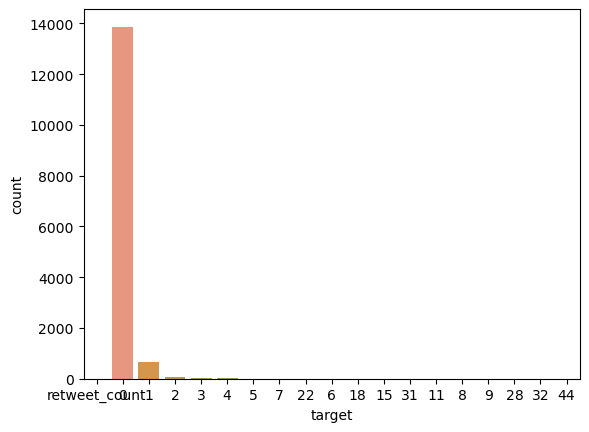

In [19]:
import seaborn as sns
sns.countplot(x='target', data=df)